#Aleksas Murauskas
#260718389
#ECSE 415: Assignment 4
#Group 28

##Part 1 Segmentation

###1.1 K-Means Clustering and Expetation Minimization
In this question, you will implement K-means and EM from scratch. The
algorithms should be implemented using only the numpy library. You
can use opencv and matplotlib libraries only to read and display images but not
for clustering.

####1.1.1 K-Means CLustering

####Implement K-means clustering from scratch.

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

In [146]:
import cv2,math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive

def display_img(image, title_input):
    plt.figure(figsize = (10, 10))
    plt.imshow(image)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.title(title_input, fontsize = 20)


drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/ECSE 415/Assignment-4/'

img_path= drive_path+'flower.jpg'
base_img = cv2.imread(img_path)
gray_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2GRAY)
base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)

def KMeanAlgo(input_img, k_val, img_list, result_tits):
  img_arr = input_img.astype(np.float64) #Turn to numpy array
  centroids = np.random.random_sample((k_val, 3)) * 255.0
  for i in range(10): #Iterations 
    distances = np.array([img_arr - c for c in centroids]) 
    distances = np.linalg.norm(distances, axis=-1) #Set distances to the norm
    cluster_vectors = np.argmin(distances, axis=0) #Create Clusters
    new_centroids = np.empty(shape=(k_val,3))#Create empty Centroids
    for c in range(k_val): #For each kernel
      np.mean(img_arr[cluster_vectors == c], axis=0, out=new_centroids[c])
    centroids = new_centroids #assign centroids with new value
    #Append to list
    img_list.append(cluster_vectors.astype(np.uint8))
    result_tits.append("K="+str(k_val)+" Iteration "+str(i+1))

def KMeanAlgo_gray(input_img, k_val, img_list, result_tits):
  input_img = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
  img_arr = input_img.astype(np.float64) #Turn to numpy array
  centroids = np.random.random_sample((k_val, 3)) * 255.0
  for i in range(10): #Iterations 
    distances = np.array([img_arr - c for c in centroids]) 
    distances = np.linalg.norm(distances, axis=-1) #Set distances to the norm
    cluster_vectors = np.argmin(distances, axis=0) #Create Clusters
    new_centroids = np.empty(shape=(k_val,3))#Create empty Centroids
    for c in range(k_val): #For each kernel
      np.mean(img_arr[cluster_vectors == c], axis=0, out=new_centroids[c])
    centroids = new_centroids #assign centroids with new value
    #Append to list
    img_list.append(cluster_vectors.astype(np.uint8))
    result_tits.append("K="+str(k_val)+" Iteration "+str(i+1))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Apply your implementation of K-means to the provided image with K=2 and K=3. Use R, G, B color channels of the image as three features. Display (a) the segmentation evolving during the first 5 iterations and (b) the final segmentation.

In [145]:
k2result_imgs =[]
k2result_tits =[]
k3result_imgs =[]
k3result_tits =[]

#Run on K=2
kMeanAlgo(base_img,2,k2result_imgs,k2result_tits)
#Run on K=3
kMeanAlgo(base_img,3,k3result_imgs,k3result_tits)

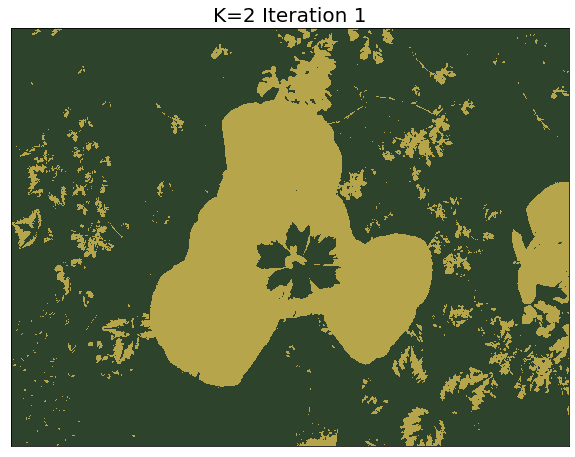

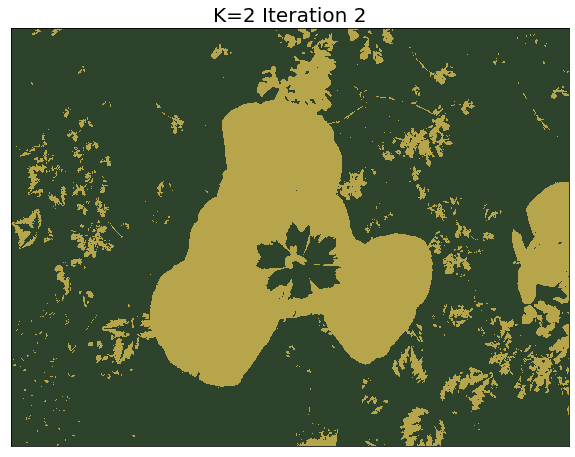

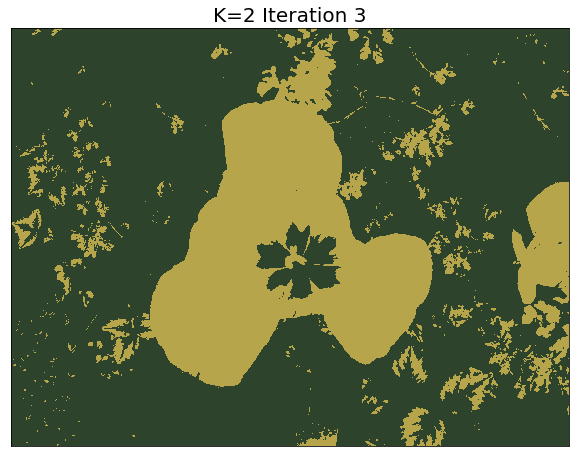

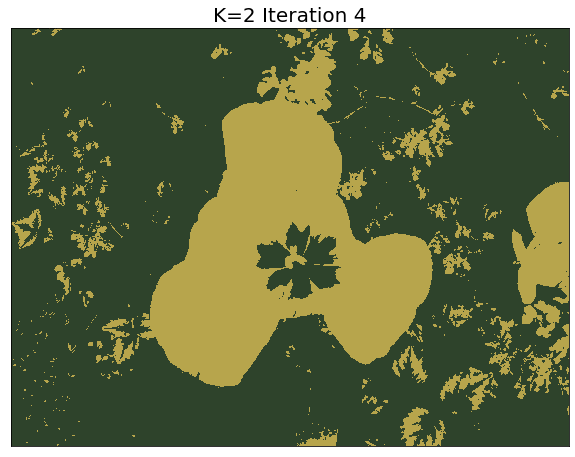

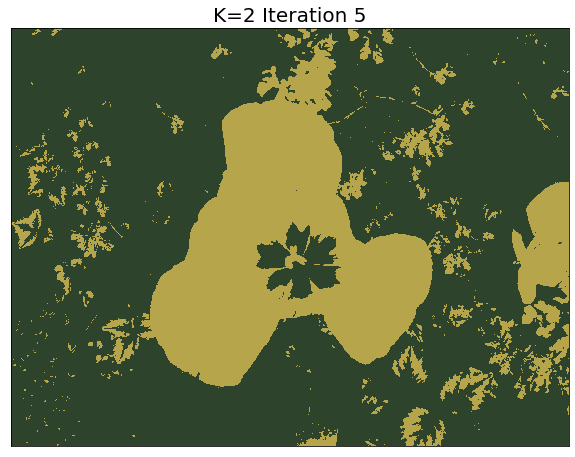

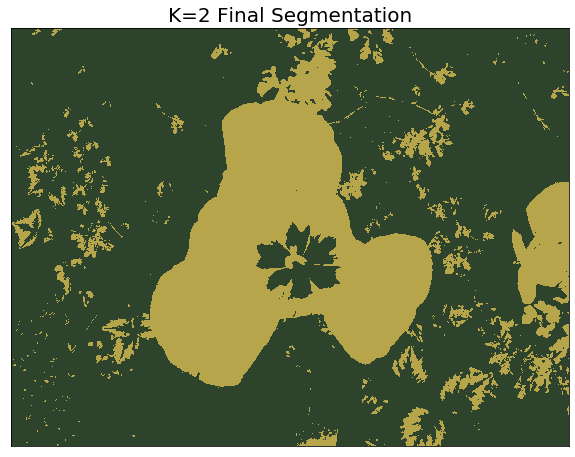

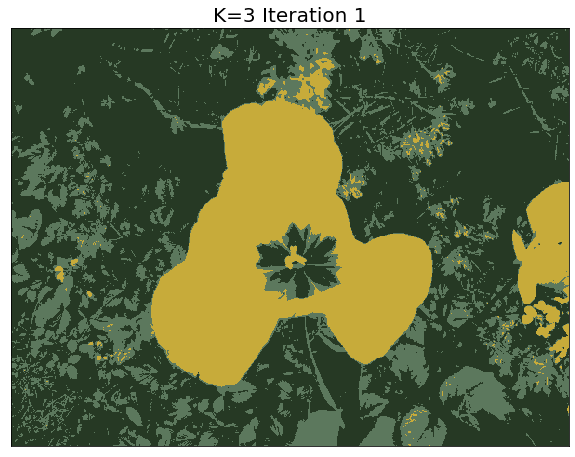

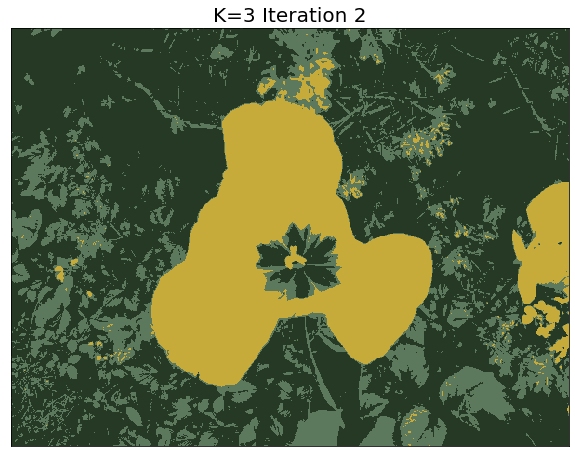

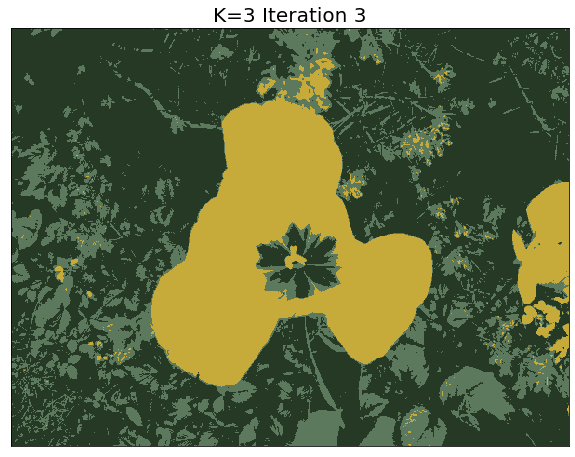

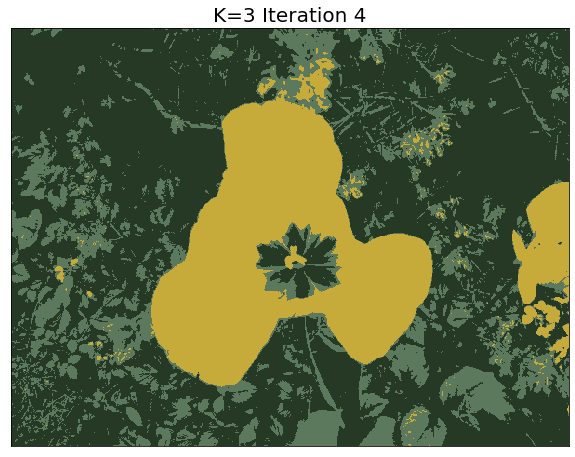

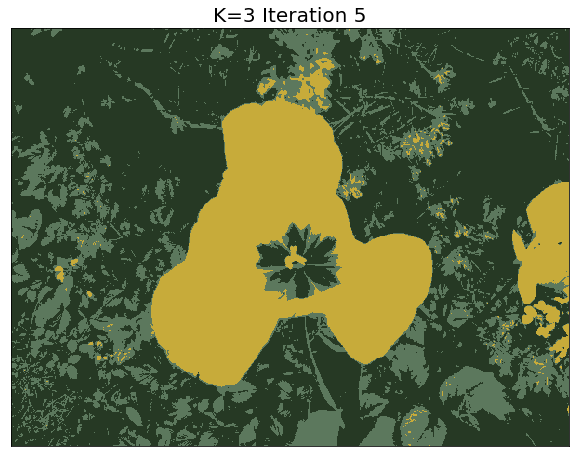

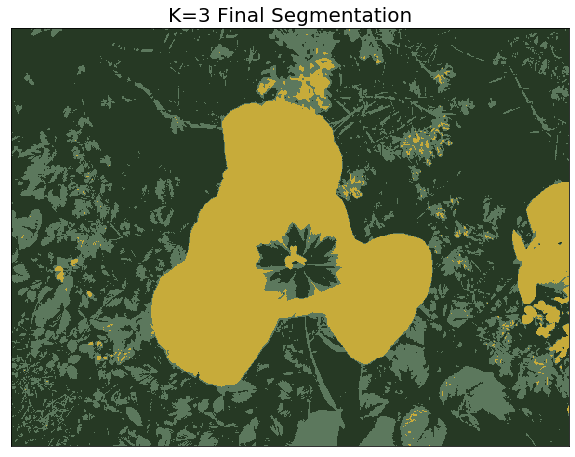

In [147]:
#Print first 5 iterations
for a in range(5):
  display_img(k2result_imgs[a],k2result_tits[a])
display_img(k2result_imgs[-1],k2result_tits[-1])
#Print Final Iteration 

#Print first 5 iterations
for a in range(5):
  display_img(k3result_imgs[a],k3result_tits[a])
display_img(k3result_imgs[-1],k3result_tits[-1])
#Print Final Iteration 

####Compare final segmentation maps of color and gray-scale images. Which  feature results in better segmentation?

In [148]:
k2Gray_imgs =[]
k2Gray_tits =[]
k3Gray_imgs =[]
k3Gray_tits =[]

#On K=2
KMeanAlgo_gray(gray_img,2,k2Gray_imgs,k2Gray_tits)
#On K=3
KMeanAlgo_gray(gray_img,3,k3Gray_imgs,k3Gray_tits)

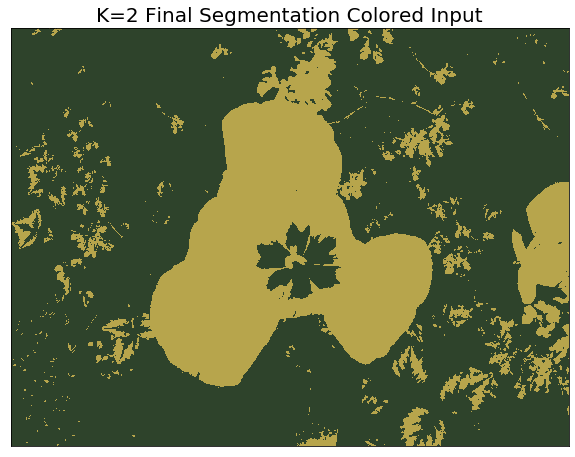

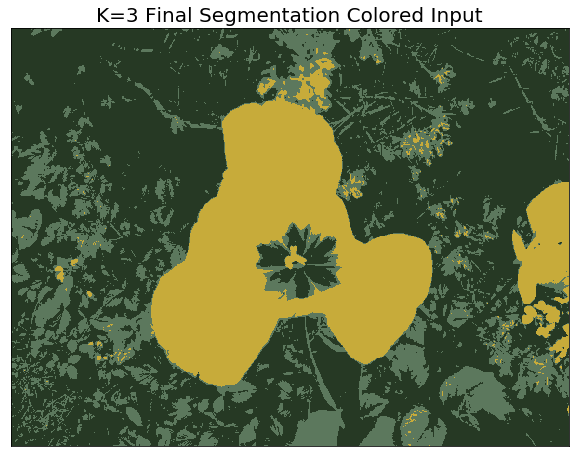

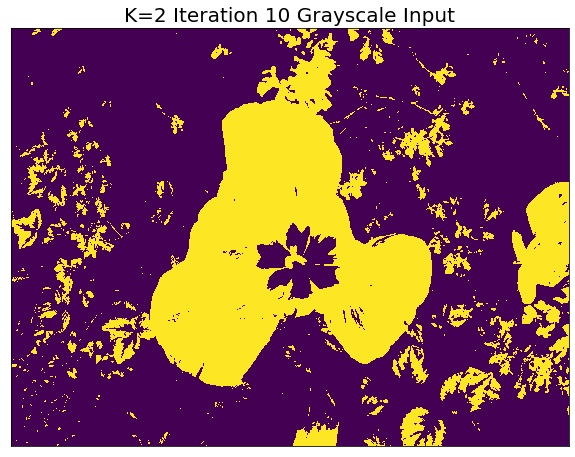

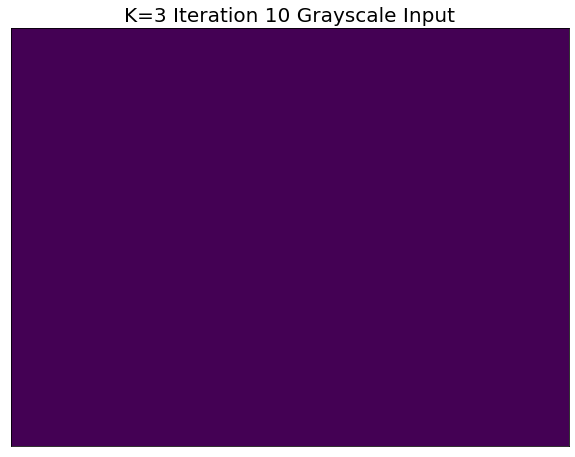

In [149]:
display_img(k2result_imgs[-1],k2result_tits[-1]+" Colored Input")
display_img(k3result_imgs[-1],k3result_tits[-1]+" Colored Input")

display_img(k2Gray_imgs[-1],k2Gray_tits[-1]+" Grayscale Input")
display_img(k3Gray_imgs[-1],k3Gray_tits[-1]+" Grayscale Input")

K =2 is relatively similar for both Grayscale and Colored

K=3 is performes better on the colored image.

####1.1.2 Expectation Maximization - Gaussian Micture Model

####Implement EM from scratch.

In [150]:
drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/ECSE 415/Assignment-4/'


img_path= drive_path+'flower.jpg'
base_img = cv2.imread(img_path)
base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2GRAY)

def new_EM(input_img, gaussian_num,img_list, result_tits):
  #Set mu value
  u = np.random.random((gaussian_num, 3)) * 255.0
  #Set standard deviation
  st_Dev = np.full((gaussian_num, 3), (255.0 / gaussian_num))
  #Set Probability
  probability = np.full((gaussian_num), (1.0 / gaussian_num))
  height, width = input_img.shape[:2]
  for i in range(10): #10 Iterations
    exponential = np.empty(shape=(height, width, gaussian_num))
    for y in range(height):
      for x in range(width): 
        exponential[y][x] = np.linalg.norm(math.e**(-0.5 * np.power((input_img[y][x]-u)/st_Dev, 2)) / (math.sqrt(2*math.pi) * st_Dev), axis=-1) #Use gaussian equation 
    base_denominator = np.sum(exponential * probability, axis=-1)
    base_denominator = base_denominator.reshape((height, width, 1))
    exponential = exponential/base_denominator
    clus = np.argmax(exponential, axis=-1)
    img_list.append(clus.astype(np.uint8))
    result_tits.append("K="+str(gaussian_num)+" Iteration "+str(i+1))
    for k in range(gaussian_num): 
      val=0
      for y in range(height):
        for x in range(width): 
          val+=exponential[y, x, k]*input_img[y, x]
      u[k] = val/np.sum(exponential[:,:,k])
      current_clusts = input_img[clus==k]
      st_Dev[k] = np.sqrt(np.var(current_clusts, axis=0))
      probability[k] = np.size(current_clusts) / np.size(input_img)

def new_EM_gray(input_img, gaussian_num,img_list, result_tits):
  input_img = cv2.cvtColor(input_img, cv2.COLOR_GRAY2BGR)
  u = np.random.random((gaussian_num, 3)) * 255.0
  st_Dev = np.full((gaussian_num, 3), (255.0 / gaussian_num))
  probability = np.full((gaussian_num), (1.0 / gaussian_num))
  height, width = input_img.shape[:2]
  for i in range(10):
    exponential = np.empty(shape=(height, width, gaussian_num))
    for y in range(height):
      for x in range(width): 
        exponential[y][x] = np.linalg.norm(math.e**(-0.5 * np.power((input_img[y][x]-u)/st_Dev, 2)) / (math.sqrt(2*math.pi) * st_Dev), axis=-1)
    base_denominator = np.sum(exponential * probability, axis=-1)
    base_denominator = base_denominator.reshape((height, width, 1))
    exponential = exponential / base_denominator
    clus = np.argmax(exponential, axis=-1)
    #Append List
    img_list.append(clus.astype(np.uint8))
    result_tits.append("K="+str(gaussian_num)+" Iteration "+str(i+1))
    for k in range(gaussian_num): 
      e = 0
      for y in range(height):
        for x in range(width): 
          e += exponential[y, x, k] * input_img[y, x]
      u[k] = e / np.sum(exponential[:,:,c])
      current_clusts = input_img[clus==k]
      st_Dev[k] = np.sqrt(np.var(current_clusts, axis=0))
      probability[k] = np.size(current_clusts) / np.size(input_img)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Apply your implementation of EM to the provided image with 2 and 3 Gaussian components. Use R, G, B color channels of the image as three features. Display (a) the segmentation evolving during the first 5 iterations and (b) the final segmentation.

In [5]:
g2result_imgs =[]
g2result_tits =[]
g3result_imgs =[]
g3result_tits =[]
#K=2
new_EM(base_img,2,g2result_imgs,g2result_tits)
#K=3
new_EM(base_img,3,g3result_imgs,g3result_tits)

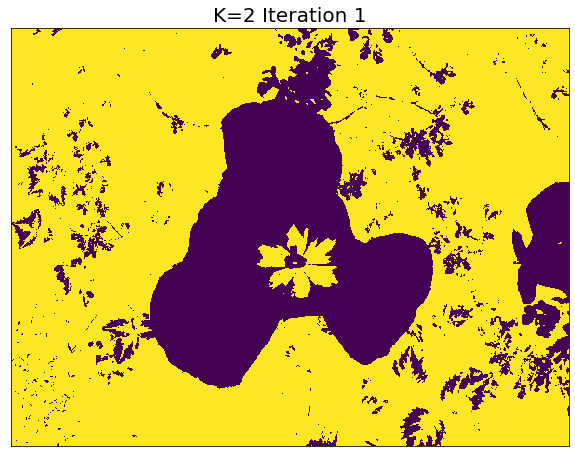

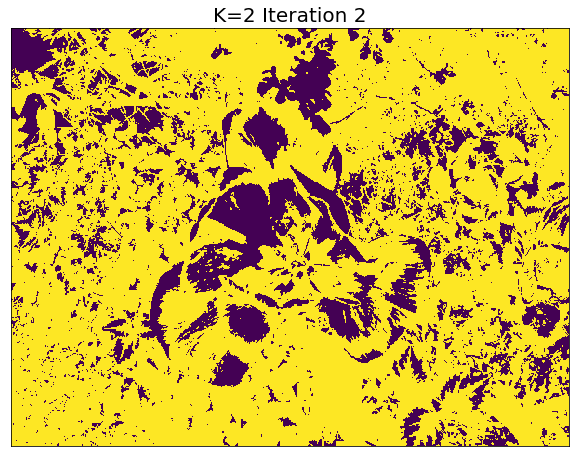

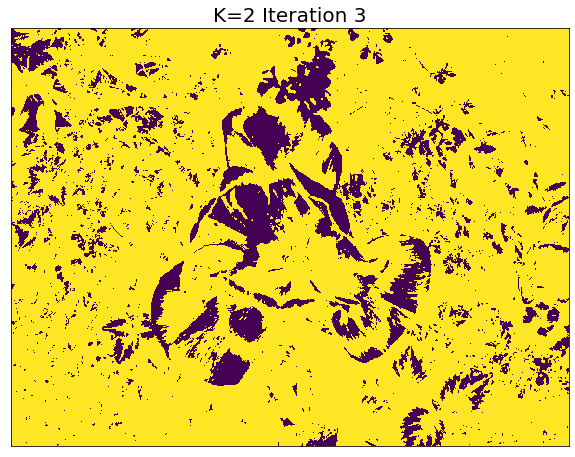

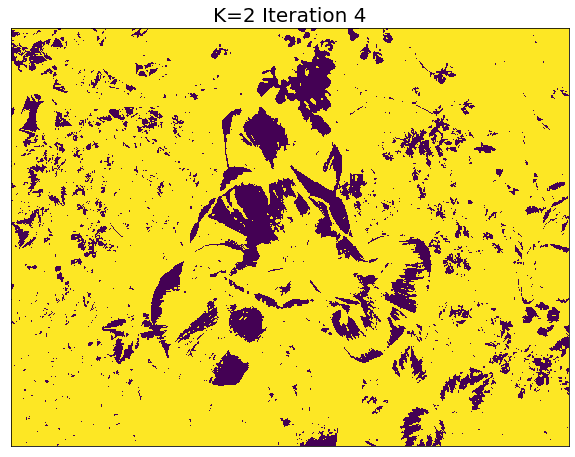

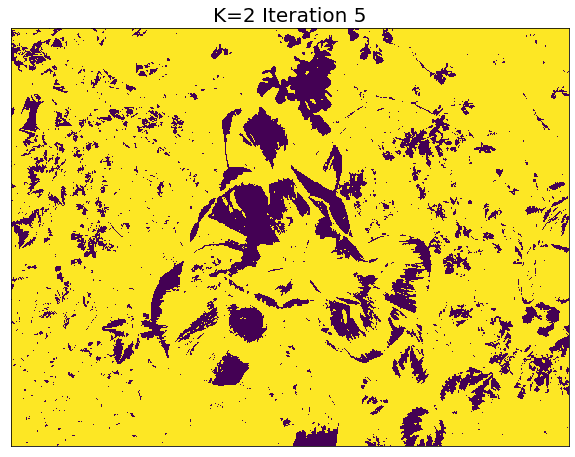

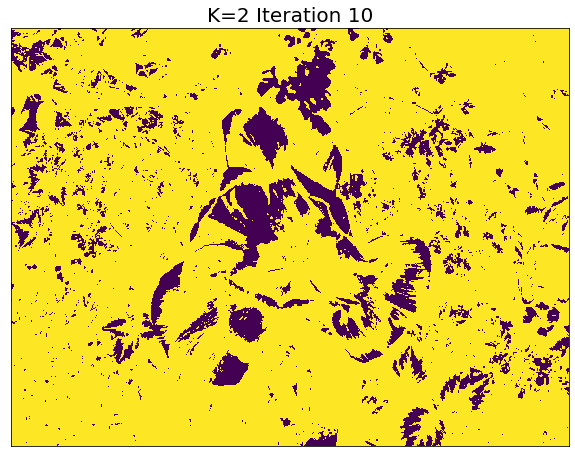

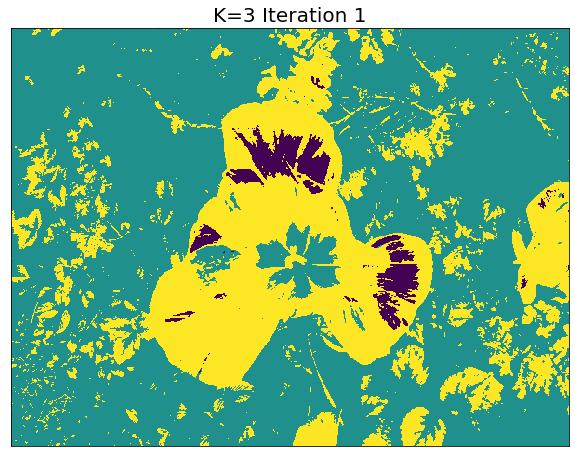

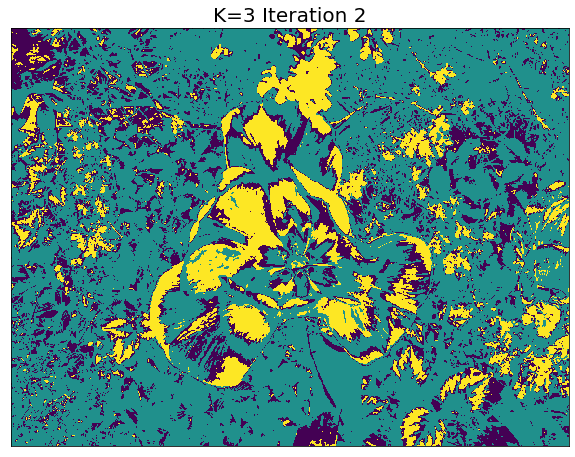

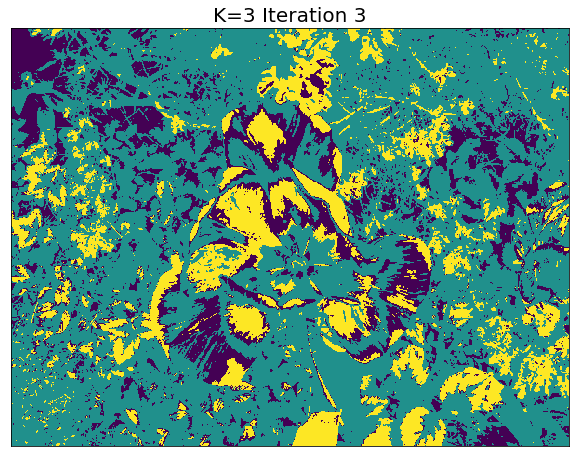

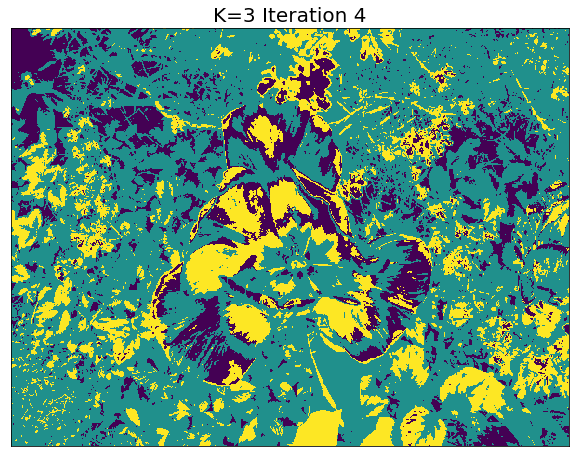

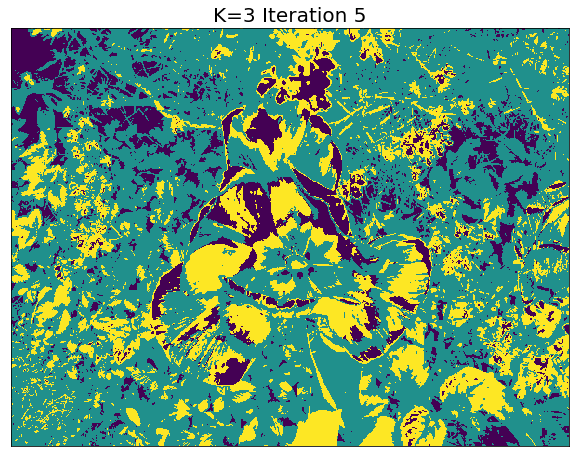

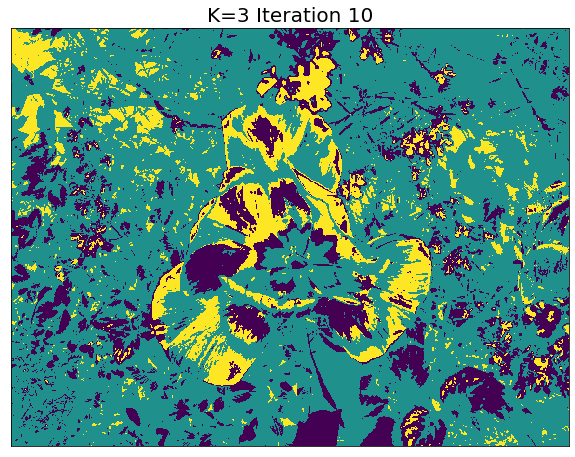

In [6]:
#First 5 Iterations
for a in range(5):
  display_img(g2result_imgs[a],g2result_tits[a])
#Display Final Iteration
display_img(g2result_imgs[-1],g2result_tits[-1])
#First 5 Iterations
for a in range(5):
  display_img(g3result_imgs[a],g3result_tits[a])
#Display Final Iteration
display_img(g3result_imgs[-1],g3result_tits[-1])

####Convert the given image into gray-scale. Apply EM to the provided image with 2 and 3 Gaussian components. For every pixel, use gray-scale intensity as feature. Display (a) the segmentation evolving during the first 5 iterations and (b) the final segmentation.

In [ ]:
grayG2result_imgs =[]
grayG2result_tits =[]
grayG3result_imgs =[]
grayG3result_tits =[]

#K=2
new_EM_gray(gray_img,2,grayG2result_imgs,grayG2result_tits)
#K=3
new_EM_gray(gray_img,3,grayG3result_imgs,grayG3result_tits)

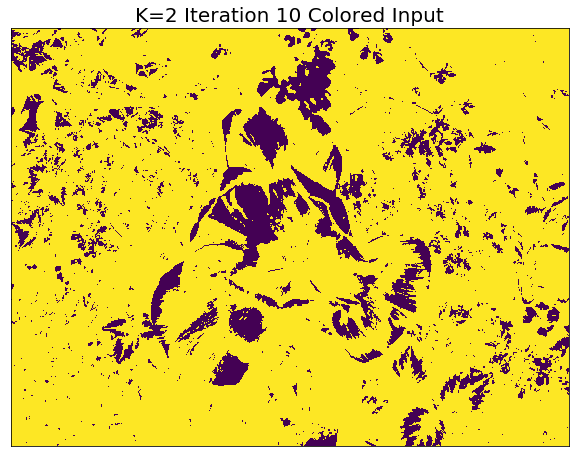

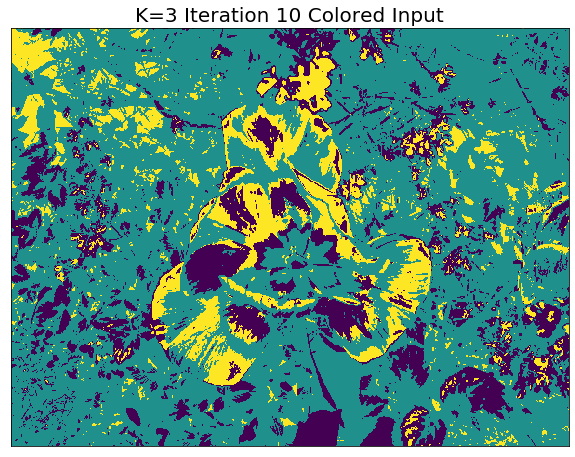

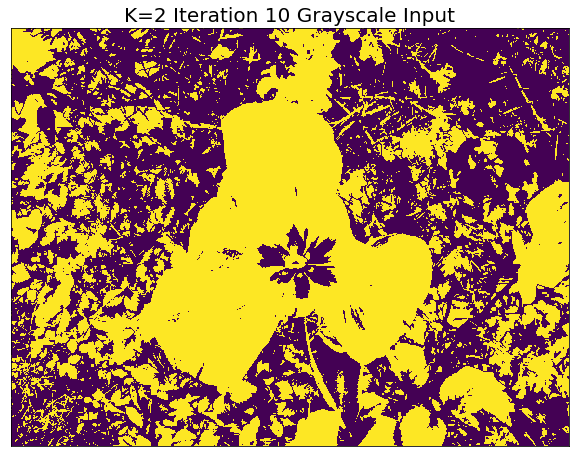

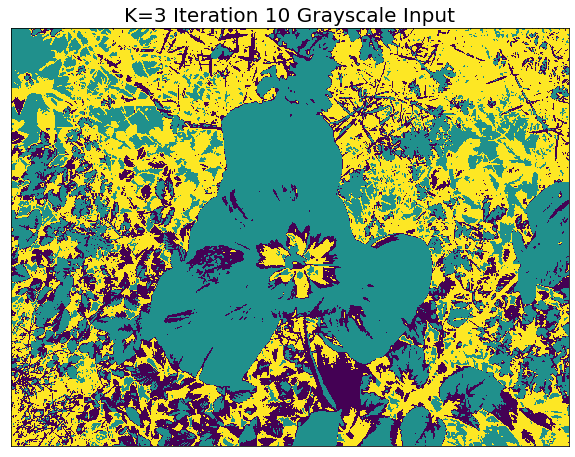

In [12]:
display_img(g2result_imgs[-1],g2result_tits[-1]+" Colored Input")
display_img(g3result_imgs[-1],g3result_tits[-1]+" Colored Input")

display_img(grayG2result_imgs[-1],grayG2result_tits[-1]+" Grayscale Input")
display_img(grayG3result_imgs[-1],grayG3result_tits[-1]+" Grayscale Input")

####Compare final segmentation maps of color and gray-scale images. Which feature results in better segmentation?

Segmentation Appears to have performed better on the grayscale image. 

###1.2 Normalized Graph-cut and Mean-shift Segmentation
You can use functions from OpenCV or skimage libraries for this question.

####Segment the given image using normalized graph-cuts. Vary the following parameters (try several values of each parameter): compactness and n segments (slic function), thresh (cut normalized function). Display segmenation results for several parameters and state their effect on the output

In [11]:
!pip install numpy --upgrade
!pip install scipy --upgrade
!pip install matplotlib --upgrade
!pip install ipython --upgrade
!pip install pandas --upgrade
!pip install sympy --upgrade
!pip install nose --upgrade

Requirement already up-to-date: numpy in /usr/local/lib/python3.7/dist-packages (1.20.2)
Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.6.2)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.1)
Requirement already up-to-date: ipython in /usr/local/lib/python3.7/dist-packages (7.22.0)
Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.4)
Requirement already up-to-date: sympy in /usr/local/lib/python3.7/dist-packages (1.8)
Requirement already up-to-date: nose in /usr/local/lib/python3.7/dist-packages (1.3.7)


In [40]:
import cv2,math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data, segmentation,color
from skimage.future import graph
from sklearn.cluster import MeanShift
from google.colab import drive

def display_img(image, title_input):
    plt.figure(figsize = (5, 5))
    plt.imshow(image)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.title(title_input, fontsize = 20)


drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/ECSE 415/Assignment-4/'


img_path= drive_path+'flower.jpg'
base_img = cv2.imread(img_path)
base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)

seg_vals = [5,10,15] #3 values 
compact_vals = [0.01,0.1, 10] #3 Values
threshold_vals =[0.001,0.01,0.1] #3 Values 
#Total of 27 images 


graphs=[]
g_titles =[]

for se in seg_vals:
  for co in compact_vals:
    for th in threshold_vals:
      active_tit = "Seg: "+str(se)+", Comp: "+ str(co)+", Thresh: "+ str(th)
      labels1 = segmentation.slic(base_img, compactness=co, n_segments=se)
      out1 = color.label2rgb(labels1, base_img, kind='avg')
      g = graph.rag_mean_color(base_img, labels1, mode='similarity')
      labels2 = graph.cut_normalized(labels1, g, thresh=th)
      out2 = color.label2rgb(labels2, img, kind='avg')
      pic_list.append(out2)
      tit_list.append(active_tit)

total_pics = len(graphs)

for x in range(total_pics):
  display_img(graphs[x],g_titles[x])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyError: ignored

Error Explanation: In this method, i have essentially approriated code from tutorial 9. However, I encounter an error with a python library method. Some call that rag_mean_color makes reults in key error 0.  I know based on the tutorial code and discussion with other groups that this code should work and I am unsure what the cause of the error is. I think it may be a issue with my python version. 

I tried following the solutions proposed in the following stack overflow thread but no luck.
https://stackoverflow.com/questions/27952185/error-in-scikit-image-example-rag-thresholding

Based upon research on the topic since I was unable to solve the error I expect the following:

Segments: An Increase in this parameter results in an increase in the number of clusters in the resulting image. 

Compactness: This parameter repesents the balance between color proximity and space proximity. The greater the value the more space proximity is weighted. 

Thresholds:This parameter represents the maximum number of segmentation within a region. A subgraph will stop being divided if the value exceeds this value. 

####Segment the given image using mean-shift. Vary the following parameters (try several values of each parameter): ratio, kernel size, max dist. Display segmentation results for several parameters and state their effect on the output.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


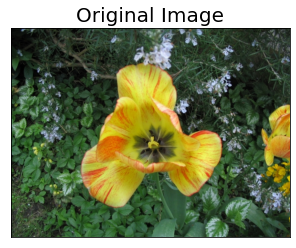

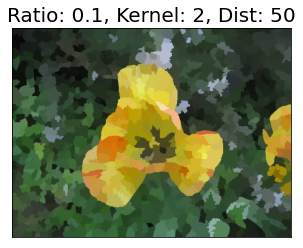

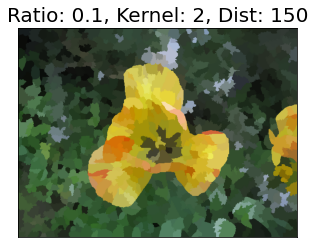

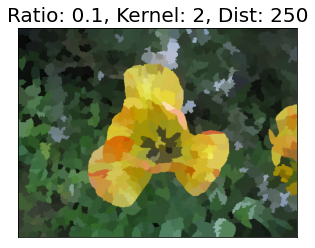

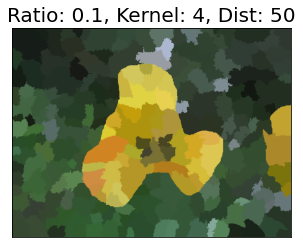

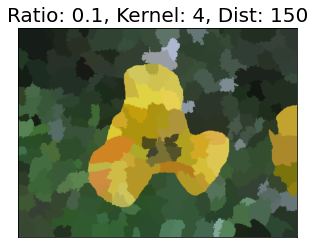

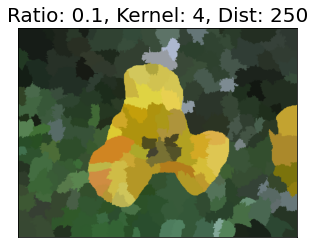

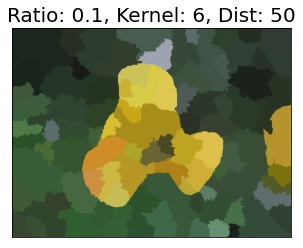

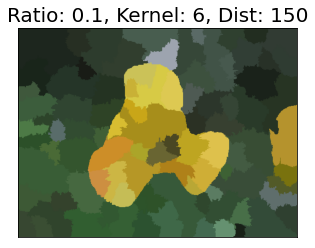

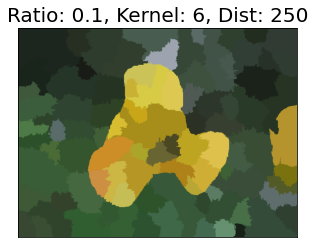

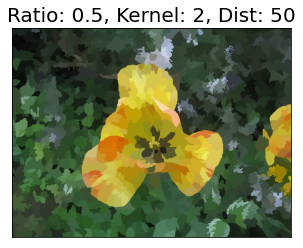

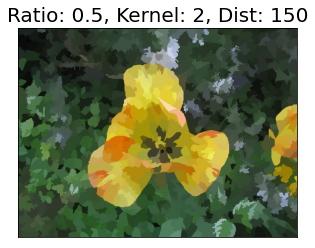

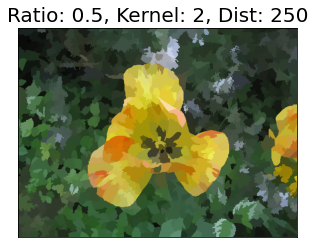

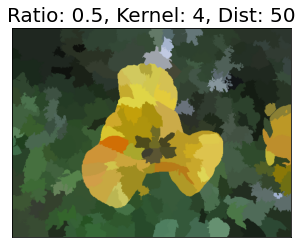

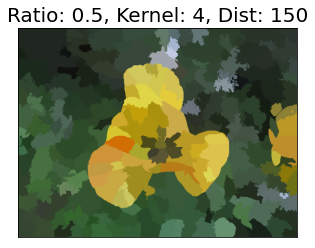

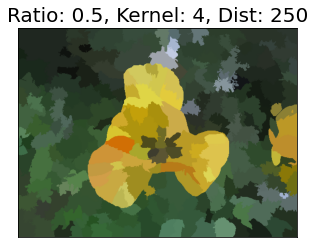

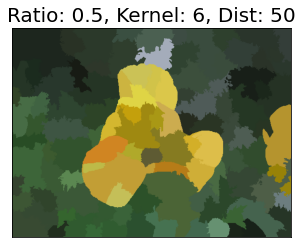

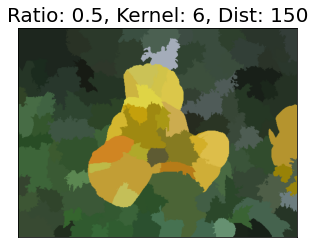

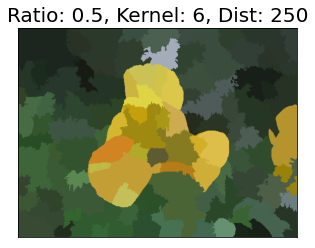

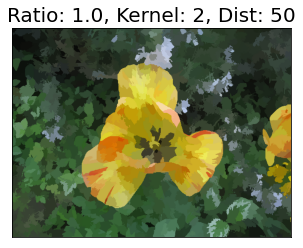

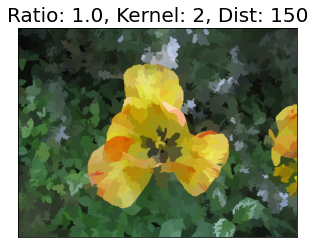

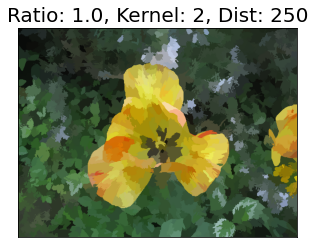

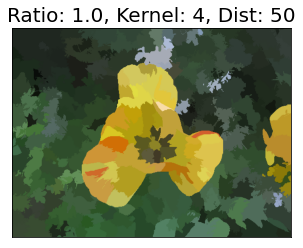

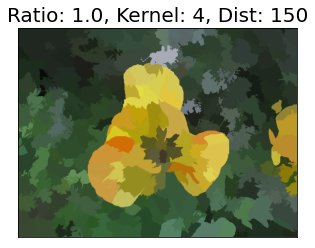

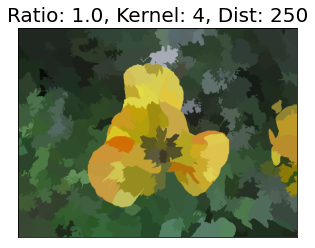

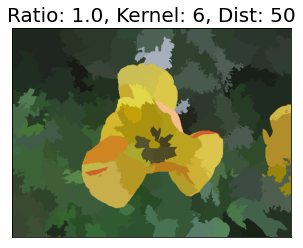

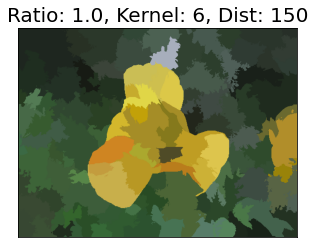

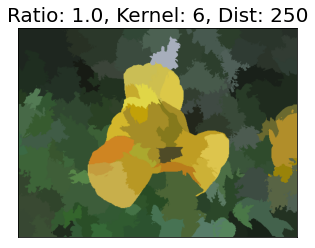

In [100]:
from skimage.segmentation import quickshift
from skimage import segmentation, color

img_path= drive_path+'flower.jpg'
base_img = cv2.imread(img_path)
base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)
display_img(base_img, "Original Image")


def display_img(image, title_input):
    plt.figure(figsize = (5, 5))
    plt.imshow(image)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.title(title_input, fontsize = 20)


ratio_vals =[0.1,0.5,1.0] #3 Values
kernel_vals =[2,4,6] #3 Values
dist_vals =[50,150,250] #3 Values

#label = quickshift(base_img,max_dist=100)
#out = color.label2rgb(label, base_img, kind='avg')

mean_img=[]
mean_tits =[]

for ra in ratio_vals:
  for ke in kernel_vals:
    for di in dist_vals:
      active_tit = "Ratio: "+str(ra)+", Kernel: "+ str(ke)+", Dist: "+ str(di)
      label = quickshift(base_img,ratio=ra,kernel_size=ke,max_dist=di)
      output_img = color.label2rgb(label, base_img, kind='avg')
      mean_img.append(output_img)
      mean_tits.append(active_tit)
total_pics = len(mean_img)

for x in range(total_pics):
  display_img(mean_img[x],mean_tits[x])

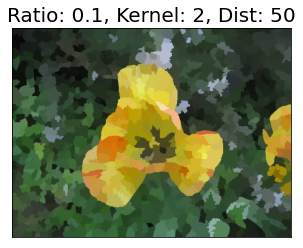

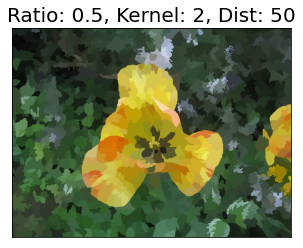

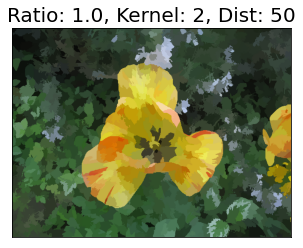

In [105]:
for a in range(3):
  display_img(mean_img[a*9],mean_tits[a*9])

Ratio: This parmater can range from one to 1. The larger the value, the more weght is given to colorspace during segmentation. As I increased the Ratio, there was little change, if anything there seems to be a slight increase in clusters in the higher ratios. In comparison to the other two parameters, this is negligible. 

Kernel: This parameter represents the number of clusters in the smoothing process. The larger the kernel size, there will be fewer clusters.

Distance: The parameter represents the cut off point in distance. The larger this value, the fewer clusters will exist. 


##2 Image Classiffcation with Convolutional Neural Network

In this part, you will classify MNIST digits into 10 categories using a CNN. You
may chose to run the code on GPU.

###Use Pytorch class torchvision.datasets.MNIST to (down)load the dataset. Use batch size of 32.

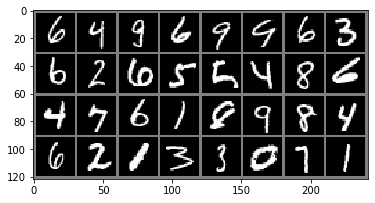

  Six  Four  Nine   Six


In [87]:
#Code retrofitted from tutorial 8
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

transform = transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
#transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.1307,), (0.3081,))]))

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=32, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=32, shuffle=True)

classes = ('Zero', 'One', 'Two', 'Three',
           'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine','')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images,labels= dataiter.next()
#show images
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

###Implement a CNN with the layers mentioned below.


• A convolution layer with 32 kernels of size 3×3.

• A ReLU activation.

• A convolution layer with 64 kernels of size 3×3.

• A ReLU activation.

• A maxpool layer with kernels of size 2×2.

• A convolution layer with 64 kernels of size 3×3.

• A ReLU activation.

• A convolution layer with 64 kernels of size 3×3.

• A ReLU activation.

• A flattening layer. (This layer resizes 2D feature map to a feature vector. The length of this feature vector should be 4096.)

• A Linear layer with output size of 10.
(Suggestion: You can start with the code from the Tutorial and adapt it for the current problem.)

(Suggestion: You can start with the code from the Tutorial and adapt it
for the current problem.)

In [117]:
#Code retrofitted from tutorial 8
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3) #A convolution layer with 32 kernels of size 3×3.
        self.conv2 = nn.Conv2d(32, 64, 3)#A convolution layer with 64 kernels of size 3×3.
        self.conv3 = nn.Conv2d(64, 64, 3)#A convolution layer with 64 kernels of size 3×3.
        self.conv4 = nn.Conv2d(64, 64, 3)#A convolution layer with 64 kernels of size 3×3.
        self.pool = nn.MaxPool2d(2, 2) #A maxpool layer with kernels of size 2×2.
        self.fc1 = nn.Linear(64 * 8 * 8, 10) #A flattening layer. (This layer resizes 2D feature map to a feature vector. The length of this feature vector should be 4096.)

    def forward(self, x):
        #A convolution layer with 32 kernels of size 3×3.
        #A ReLU activation.
        x = F.relu(self.conv1(x))
        #A convolution layer with 64 kernels of size 3×3.
        #A ReLU activation.
        x = F.relu(self.conv2(x))
        #A maxpool layer with kernels of size 2×2.
        x= self.pool(x)
        #A convolution layer with 64 kernels of size 3×3.
        #A ReLU activation.
        x = F.relu(self.conv3(x))
        #A convolution layer with 64 kernels of size 3×3.
        #A ReLU activation.
        x = F.relu(self.conv4(x))
        #A flattening layer. (This layer resizes 2D feature map to a feature vector. The length of this feature vector should be 4096.)
        x =x.view(-1,4096)
        x = self.fc1(x)
        #A Linear layer with output size of 10.
        return x
net = Net()

###Create an instance of SGD optimizer with learning rate of 0.001. Use the default setting for rest of the hyperparameters. Create an instance of categorical cross entropy criterion.

In [118]:
#Code retrofitted from tutorial 8
import torch.optim as optim
criterion = nn.CrossEntropyLoss() #Create Criterion 
optimizer = optim.SGD(net.parameters(), lr=0.001)

###Train the CNN for 12 epochs.

In [120]:
#Code retrofitted from tutorial 8
for epoch in range(12):  # loop over the dataset multiple times
    print("We are in Epoch number: "+str(epoch+1))
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

We are in Epoch number: 1
We are in Epoch number: 2
We are in Epoch number: 3
We are in Epoch number: 4
We are in Epoch number: 5
We are in Epoch number: 6
We are in Epoch number: 7
We are in Epoch number: 8
We are in Epoch number: 9
We are in Epoch number: 10
We are in Epoch number: 11
We are in Epoch number: 12


###Predicts labels of the test images using the above trained CNN. Measure and display classification accuracy.

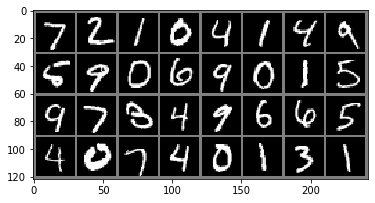

GroundTruth:  Seven   Two   One  Zero


In [121]:
#Code retrofitted from tutorial 8
dataiter = iter(testloader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [122]:
#Code retrofitted from tutorial 8
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [123]:
#Code retrofitted from tutorial 8
outputs = net(images)

In [124]:
#Code retrofitted from tutorial 8
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  Seven   Two   One  Zero


In [125]:
#Code retrofitted from tutorial 8
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


In [126]:
#Code retrofitted from tutorial 8
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10): #Print accuracy of classes
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of  Zero : 97 %
Accuracy of   One : 97 %
Accuracy of   Two : 95 %
Accuracy of Three : 99 %
Accuracy of  Four : 97 %
Accuracy of  Five : 96 %
Accuracy of   Six : 97 %
Accuracy of Seven : 95 %
Accuracy of Eight : 97 %
Accuracy of  Nine : 96 %
